In [1]:
#STEP 1: Load data
from keras.datasets import imdb
#keep only the top 10000 most frequently occurring words in the training data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

D:\InstalledSoftware\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#STEP 2: Encoding the integer sequences into a binary matrix [One-hot encode]
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
    #Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    #Set specific indices of results[i] to 1s
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
                       

In [3]:
#STEP 3: Vectorize Training Data, Test Data, Training Label & Test Label

#Data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#Labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
#STEP 4A: Model definition without regularization
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

def build_model_no_regularization():
    model = models.Sequential()
    model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
    model.add(layers.Dense(16, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
                 loss = losses.binary_crossentropy,
                 metrics = [metrics.binary_accuracy])
    return model

In [5]:
#STEP 4B: Model definition with lower capacity and without regularization
#Can be either reduction in layers or in # of units or both
#In this case reducting # of units per layer (16 --> 4)

def build_model_low_capacity():
    model = models.Sequential()
    model.add(layers.Dense(4, activation = 'relu', input_shape = (10000,)))
    model.add(layers.Dense(4, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
                 loss = losses.binary_crossentropy,
                 metrics = [metrics.binary_crossentropy])
    return model

In [6]:
#STEP 4C: Model definition with higher capacity and without regularization
#Can be either increase in layers or in # of units or both
#In this case increasing # of units per layer (16 --> 512)

def build_model_high_capacity():
    model = models.Sequential()
    model.add(layers.Dense(512, activation = 'relu', input_shape = (10000,)))
    model.add(layers.Dense(512, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
                 loss = losses.binary_crossentropy,
                 metrics = [metrics.binary_crossentropy])
    return model

In [7]:
#STEP 4D: Model definition with L2 Weight regularization

from keras import regularizers
def build_model_L2_regularization():
    model = models.Sequential()
    model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_shape = (10000,)))
    model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
                 loss = losses.binary_crossentropy,
                 metrics = [metrics.binary_crossentropy])
    return model

In [8]:
#STEP 4E: Model definition with simultaneous L1 and L2 Weight regularization

def build_model_L1L2_regularization():
    model = models.Sequential()
    model.add(layers.Dense(16, kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001),
                          activation = 'relu', input_shape = (10000,)))
    model.add(layers.Dense(16, kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001),
                          activation = 'relu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
                 loss = losses.binary_crossentropy,
                 metrics = [metrics.binary_crossentropy])
    return model

In [9]:
#STEP 5: Setting aside Validation set
#set apart 10,000 samples in the training data to use as a validation set
x_val = x_train[: 10000] #first 10000 samples from x_train
partial_x_train = x_train[10000 :] #remaining for training (10000 onwards)
y_val = y_train[: 10000]
partial_y_train = y_train[10000 :]

In [10]:
#STEP 6: Training models

no_regularization_model = build_model_no_regularization()
low_capacity_model = build_model_low_capacity()
high_capacity_model = build_model_high_capacity()
L2_regularization_model = build_model_L2_regularization()
L1L2_regularization_model = build_model_L1L2_regularization()

history_nr = no_regularization_model.fit(partial_x_train,
                                        partial_y_train,
                                        epochs = 40,
                                        batch_size = 512,
                                        validation_data = (x_val, y_val),
                                        verbose = 0)
dict_history_nr = history_nr.history
print(dict_history_nr.keys())

history_lc = low_capacity_model.fit(partial_x_train,
                                   partial_y_train,
                                   epochs = 40,
                                   batch_size = 512,
                                   validation_data = (x_val, y_val),
                                   verbose = 0)
dict_history_lc = history_lc.history
print(dict_history_lc.keys())

history_hc = high_capacity_model.fit(partial_x_train,
                                    partial_y_train,
                                    epochs = 40,
                                    batch_size = 512,
                                    validation_data = (x_val, y_val),
                                    verbose = 0)
dict_history_hc = history_hc.history
print(dict_history_hc.keys())

history_l2 = L2_regularization_model.fit(partial_x_train,
                                        partial_y_train,
                                        epochs = 40,
                                        batch_size = 512,
                                        validation_data = (x_val, y_val),
                                        verbose = 0)
dict_history_l2 = history_l2.history
print(dict_history_l2.keys())

history_l1l2 = L1L2_regularization_model.fit(partial_x_train,
                                            partial_y_train,
                                            epochs = 40,
                                            batch_size = 512,
                                            validation_data = (x_val, y_val),
                                            verbose = 0)
dict_history_l1l2 = history_l1l2.history
print(dict_history_l1l2.keys())

dict_keys(['val_loss', 'val_binary_crossentropy', 'loss', 'binary_crossentropy'])
dict_keys(['val_loss', 'val_binary_crossentropy', 'loss', 'binary_crossentropy'])
dict_keys(['val_loss', 'val_binary_crossentropy', 'loss', 'binary_crossentropy'])
dict_keys(['val_loss', 'val_binary_crossentropy', 'loss', 'binary_crossentropy'])
dict_keys(['val_loss', 'val_binary_crossentropy', 'loss', 'binary_crossentropy'])


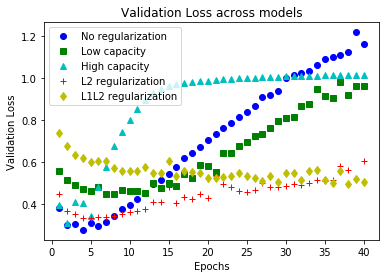

In [12]:
#STEP 7: For all models plot the validation losses
import matplotlib.pyplot as plt

val_loss_nr = history_nr.history['val_loss']

val_loss_lc = history_lc.history['val_loss']

val_loss_hc = history_hc.history['val_loss']

val_loss_l2 = history_l2.history['val_loss']

val_loss_l1l2 = history_l1l2.history['val_loss']

epochs = range(1, len(val_loss_nr) + 1)

plt.plot(epochs, val_loss_nr, 'bo', label = 'No regularization')
plt.plot(epochs, val_loss_lc, 'gs', label = 'Low capacity')
plt.plot(epochs, val_loss_hc, 'c^', label = 'High capacity')
plt.plot(epochs, val_loss_l2, 'r+', label = 'L2 regularization')
plt.plot(epochs, val_loss_l1l2, 'yd', label = 'L1L2 regularization')
plt.title('Validation Loss across models')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()